# Building a Simple Linear Regression from Scratch!

## Exploratory Analysis

In [1]:
import pandas as pd                                     # Let's import required libraries
import numpy as np
print("Successfully imported!")

Successfully imported!


In [2]:
df=pd.read_csv("Lemonade.csv")                          # Read the csv and have a peek at the first 5 rows of our simple dataset
df.head(5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


Dataset includes lemonade sales of a kid through 2017. Some measures are taken for each day to decide which factor affects sales most.

In [3]:
df.shape                                                # Dataset includes 365 rows and 7 columns.

(365, 7)

In [4]:
df.isnull().sum()                                       # Dataset does not contain any null values

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

In [5]:
df.info()                                               # Let's take a closer look at our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


"Date" and "Day" columns consist of categorical, "Temperature", "Rainfall","Flyers","Price" and "Sales" columns consist of numerical variables.

In [6]:
df.describe()                                          # Descriptive statistics on the numerical columns

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.333973,25.323288
std,16.196266,0.273171,13.178651,0.075206,6.893589
min,15.100000,0.470000,9.000000,0.300000,7.000000
25%,49.700000,0.650000,31.000000,0.300000,20.000000
50%,61.100000,0.740000,39.000000,0.300000,25.000000
75%,71.300000,0.910000,49.000000,0.300000,30.000000
max,102.900000,2.500000,80.000000,0.500000,43.000000


In [7]:
import matplotlib.pyplot as plt                        # Required libraries for visualization
import seaborn as sns

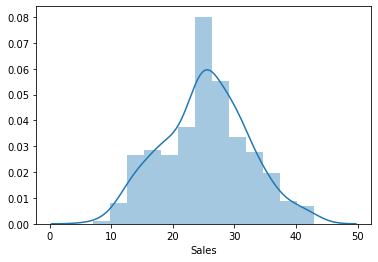

In [8]:
sns.distplot(df["Sales"])                              # Let's see how our target variable is distributed

Despite some outliers, we can say that our target variable is normally distributed. 

Correlation coefficient helps us to see if our variables are related. Pearson correlation varies between -1 and 1. 
* -1 denotes strong negative relationship, when one variable is increasing the other decreases.
* 1 denotes strong positive relationship, when one variable is increasing the other also increases.

To apply simple linear regression model, we expect a strong positive relationship with our variable and target variable. 
Accepted correlations are predetermined as >0.85 for this case.

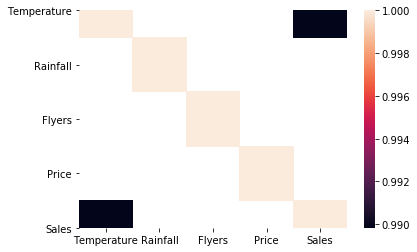

In [9]:
corr = df.corr()                                       # Finds the all correlation values between variables                                            
kot = corr[corr>=.85]                                  # Narrows the values to only accepted ones
plt.figure(figsize=(6,4))                              # Adjusts the figure size
sns.heatmap(kot)                                       # Shows a heatmap of acceptable correlation values

As the color gets darker, correlation gets stronger too. 

In [10]:
df.corr()["Sales"].sort_values(ascending=False)        # Sorts the correlation of other variables with sales in descending order

Sales          1.000000
Temperature    0.989832
Flyers         0.805183
Price          0.512908
Rainfall      -0.909214
Name: Sales, dtype: float64

Looks like Temperature has the strongest correlation with sales.

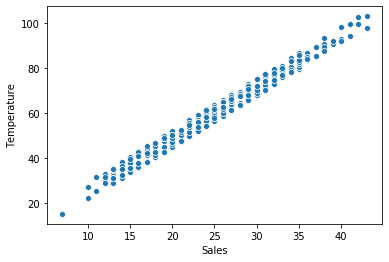

In [11]:
sns.scatterplot(x=df["Sales"],y=df["Temperature"])      # Let's draw a scatter plot to understand the relationship betetr

## Building the model

Let's take a closer look to the Simple Linear Regression formula and understand it better.

In [12]:
from IPython.display import Image                       # Import it to show images from links

In [13]:
Image(url='https://miro.medium.com/max/2872/1*k2bLmeYIG7z7dCyxADedhQ.png', width=400)

This is the clossed form of Simple Linear Regression Equation.

In [14]:
Image(url='https://dobicode.files.wordpress.com/2018/09/lyevl.gif', width=400)

Let's define a function to calculate how far a given variable is from the mean. We will use this inside our regression calculator later on.

In [15]:
def difference_from_mean(values):
    "Calculates the distance of a value from the mean"
    mean=values.mean()                                          # Calculates the mean of given values
    x=pd.Series([(val-mean) for val in values])                 # Calculates distance from mean and turns it into pandas series
    return x

This function will accept our dependent and independent variables and then calculate the linear regression equation for us.

In [16]:
def SimpleLinearRegression(dependent_var,independent_var):
    "Creates the simple linear regression equation for given 2 set of variables"
    diff_x=difference_from_mean(dependent_var)                                             # Calculates the difference from mean for dependent variable
    diff_y=difference_from_mean(independent_var)                                           # Calculates the difference from mean for independent variable
    global b1                                                                              # Defined as a global variable because we will use it later on
    b1= sum(diff_x*diff_y)/(sum(diff_x**2))                                                # Calculates the coefficient
    global b0                                                                              # Defined as a global variable because we will use it later on
    b0= (sum(independent_var)-(b1*sum(dependent_var)))/len(dependent_var)                  # Calculates the intercept
    print("\n The intercept: {}".format(b0),"\n The coefficient: {}".format(b1),           # Prints the intercept and the coefficient
          "\n Simple Regression Equation: y = {0}*x + {1} + e".format(b1,b0))              # Prints the equation
    return [b0,b1]

## Train&Test Split

Let's split our data for training and testing.  

In [17]:
shuffled_df=df.sample(frac=1)                                                              # Shuffles the dataframe to get random samples
train_size=int(0.8*len(df))                                                                # Arranges split size as %80
train_set=shuffled_df[:train_size]                                                         # Forms the training set
test_set=shuffled_df[:(1-train_size)]                                                      # Forms the testing set

Let's call our regression function and train it.

In [18]:
SimpleLinearRegression(train_set["Temperature"],train_set["Sales"])        


 The intercept: -0.16466185755511517 
 The coefficient: 0.4191949034290511 
 Simple Regression Equation: y = 0.4191949034290511*x + -0.16466185755511517 + e


[-0.16466185755511517, 0.4191949034290511]

## Predicting with the model

In [19]:
def predict_SimpleLinearRegression(test_independent_var):
    "Predicts dependent variable by using simple linear regression equation"
    global yhat                                                                           # Defined as global variable because we will use it later on
    yhat=b1*test_independent_var+b0                                                       # Put the independent variable into equation
    return yhat                                                                           # Return the series of predicted values

Let's try it on our dataset.

In [20]:
predict_SimpleLinearRegression(test_set["Temperature"])

86     23.268333
219    28.634028
158    37.856316
238    27.376443
269    29.472418
         ...    
174    33.580528
59     24.106723
93     25.867342
68     24.651676
140    29.891613
Name: Temperature, Length: 74, dtype: float64

## Evaluating what model predicts

The most common evaluation metric for Simple Linear Regression is RMSE. Let's see how it can be calculated without using scikit-learn's library.

In [21]:
Image(url='https://media.geeksforgeeks.org/wp-content/uploads/20200622171741/RMSE1.jpg', width=400)    

In [22]:
def RMSE(predicted,actual):
    "Calculates root mean squared error"
    return (np.sqrt((sum((predicted-actual)**2))/len(predicted)))

In [23]:
RMSE(yhat,test_set["Sales"])

1.0412665957325675

Let's take a closer look on how to evaluate the R^2.

In [24]:
Image(url='https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png', width=400)  

In [39]:
def R_squared(predicted,actual):
    "Calculates coefficient of determination, the closer to 1 better the prediction"
    sum_res=sum((actual-predicted)**2)
    sum_tot=sum((difference_from_mean(actual)**2))
    return 1-(sum_res/sum_tot)

In [40]:
R_squared(yhat,test_set["Sales"])

0.9800829352174594

## Checking model by comparing our outputs with scikit-learn outputs

In [27]:
from sklearn.linear_model import LinearRegression                          # Let's import the library to check

In [28]:
reg=LinearRegression()        

x=train_set[["Temperature"]]
y=train_set[["Sales"]]

model=reg.fit(x,y)

In [29]:
model.coef_

array([[0.4191949]])

In [30]:
model.intercept_

array([-0.16466186])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# RMSE
np.sqrt(mean_squared_error(yhat,test_set["Sales"]))

1.0412665957325677

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(test_set["Sales"],yhat)

0.9800829352174594